# <center> Проект: Анализ вакансий на hh.ru

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [297]:
hh_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep = ';') # Читаем данные
hh_df.shape # Выводим размерность таблицы


(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [298]:
hh_df.head(2)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [299]:
hh_df.info()# Выводим информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [300]:
# Находим столбцы с пропусками
cols_null_percent = hh_df.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending = False)
cols_with_null

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64

5. Выведите основную статистическую информацию о столбцах.

In [301]:
hh_df.describe(include = 'object')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*

In [302]:
# Функция преобразования столбца "Образование и ВУЗ"
def get_education(education):
    education_list = education.split(' ')
    if education_list[0] == 'Высшее':
        education_type = 'высшее'
    if education_list[0] == 'Неоконченное':
        education_type = 'неоконченное высшее'
    if education_list[0] == 'Среднее':
        if education_list[1] == 'специальное':
            education_type = 'среднее специальное'
        else:
            education_type = 'среднее'  
    return education_type  

# Применим функцию к столбцу и создадим новый признак "Образование"
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education)
display(hh_df['Образование'].unique()) # Проверяем уникальные значения   

# Считаем количество соискателей со средним образованием
display(hh_df[hh_df['Образование'] == 'среднее'].shape[0])   

# Удаляем столбец "Образование и ВУЗ"
hh_df = hh_df.drop('Образование и ВУЗ', axis = 1)
                

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*

In [303]:
# Функция преобразования для получения признака "Пол"
def get_gender(gender):
    gender_list = gender.split(' ')
    if gender_list[0] == 'Мужчина':
        gender_type = 'М'
    if gender_list[0] == 'Женщина':
        gender_type = 'Ж' 
    return gender_type 

# Применяем функцию и записываем в новый столбец "Пол"
hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_gender)

# Узнаем какова доля женских резюме
display(round(hh_df['Пол'].value_counts(normalize = True) * 100, 2))

М    80.93
Ж    19.07
Name: Пол, dtype: float64

In [304]:
# Функция преобразования возраста
def get_age(age):
    age_list = age.split(' ')
    age = age_list[3]
    return age  

# Применяем функцию и записываем в новый столбец "Возраст" 
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(get_age).astype(dtype = np.int64)
display(hh_df['Возраст'])

# Найдем средний возраст соискателей
display(round(hh_df['Возраст'].mean(),1))

# Удаляем столбец "Пол, возраст"
hh_df = hh_df.drop('Пол, возраст', axis = 1)

0        39
1        60
2        36
3        38
4        26
         ..
44739    30
44740    27
44741    48
44742    24
44743    38
Name: Возраст, Length: 44744, dtype: int64

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.

In [305]:
# Проверяем количество пропусков
display(hh_df['Опыт работы'].isnull().value_counts())

# Заменяем значения "Не указано" в столбце на значение NaN и проверяем количество
hh_df['Опыт работы'] = hh_df['Опыт работы'].apply(lambda x: np.nan if x == 'Не указано' else x)
display(hh_df['Опыт работы'].isnull().value_counts())

# Функция преобразования опыта работы
def get_experience_month(experience):
    
    experience_month = ['месяц', 'месяца', 'месяцев']
    experience_year = ['лет', 'год', 'года']
    
    if experience is not np.nan:
        experience_list = experience.split(' ')
        word1 = experience_list[3]
        word2 = experience_list[5]

        if word1 in experience_year:
            if word2 in experience_month:
                experience = int(experience_list[2])*12 + int(experience_list[4])
            else:
                experience = int(experience_list[2])*12
        if word1 in experience_month:  
            experience = int(experience_list[2])
    else: 
        experience = np.nan        

    return experience

# Применяем функцию к столбцу "Опыт работы" и создаем новый признак "Опыт работы (месяц)"
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience_month)
display(hh_df['Опыт работы (месяц)'].median()) # Находим медианное значение

# Удаляем столбец "Опыт работы"
hh_df = hh_df.drop('Опыт работы', axis = 1)

False    44576
True       168
Name: Опыт работы, dtype: int64

False    44574
True       170
Name: Опыт работы, dtype: int64

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*

In [306]:
# Функция для создания признака 'Город'
def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург',
                      'Нижний Новгород','Казань',
                      'Челябинск','Омск', 'Самара',
                      'Ростов-на-Дону', 'Уфа', 'Красноярск',
                      'Пермь', 'Воронеж','Волгоград'
                      ]
    city_list = arg.split(' , ')
    city = city_list[0]
    if city == 'Москва':
        city = 'Москва'
    if city == 'Санкт-Петербург':
        city = 'Санкт-Петербург'
    if city in million_cities:
        city = 'город-миллионник'
    if city not in ['Москва', 'Санкт-Петербург', 'город-миллионник']:
        city = 'другие'       
             
    return city  

# Функция для создания признака 'Готовность к переезду'
def ready_to_move(arg):
    move_list = arg.split(' , ')
    move = move_list[1]
    if 'м.' in move: 
        move = move_list[2]
        if 'м.' in move:
            move = move_list[3]
    if (('не готов' in move) or ('не готова' in move) or ('не хочу' in move)) and ('переезд' in move):
        return False
    else: return True
    
# Функция для создания признака 'Готовность к командировкам'
def ready_to_business_trip(arg):
    business_trip_list = arg.split(' , ')
    business_trip = business_trip_list[-1]
    if ('командир' not in business_trip) or (('командир' in business_trip) & ('не готов' in business_trip)):
        return False
    else: return True      
    
# Применяем функцию get_city и находим долю соискателей по городам в процентах
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)
display(round(hh_df['Город'].value_counts(normalize=True)*100))

# Применяем функцию ready_to_move
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(ready_to_move)
display(hh_df['Готовность к переезду'].value_counts())

# применяем функцию ready_to_business_trip
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(ready_to_business_trip)
display(hh_df['Готовность к командировкам'].value_counts()) 
# Находим процент соискателей готовых и к командировкам и переезду
display(round(hh_df[hh_df['Готовность к переезду'] == True]['Готовность к командировкам'].value_counts()/hh_df.shape[0]*100))

# Удаляем столбец "Город, переезд, командировки"
hh_df = hh_df.drop('Город, переезд, командировки', axis = 1)


Москва              37.0
другие              35.0
город-миллионник    16.0
Санкт-Петербург     11.0
Name: Город, dtype: float64

False    28719
True     16025
Name: Готовность к переезду, dtype: int64

True     31641
False    13103
Name: Готовность к командировкам, dtype: int64

True     32.0
False     4.0
Name: Готовность к командировкам, dtype: float64

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>  
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [307]:
# Создаем признаки-мигалки
hh_df['полная занятость'] = hh_df['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
hh_df['частичная занятость'] = hh_df['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
hh_df['проектная работа'] = hh_df['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
hh_df['стажировка'] = hh_df['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
hh_df['волонтерство'] = hh_df['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)

hh_df['полный день'] = hh_df['График'].apply(lambda x: True if 'полный день' in x else False)
hh_df['сменный график'] = hh_df['График'].apply(lambda x: True if 'сменный график' in x else False)
hh_df['гибкий график'] = hh_df['График'].apply(lambda x: True if 'гибкий график' in x else False)
hh_df['удаленная работа'] = hh_df['График'].apply(lambda x: True if 'удаленная работа' in x else False)
hh_df['вахтовый метод'] = hh_df['График'].apply(lambda x: True if 'вахтовый метод' in x else False)

# Находим количество людей, которые ищут проектную работу и волонтерство
display(hh_df[(hh_df['проектная работа'] == True) & (hh_df['волонтерство'] == True)].shape[0])

# Находим количество людей, которые ищут вахтовый метод и гибкий график
display(hh_df[(hh_df['вахтовый метод'] == True) & (hh_df['гибкий график'] == True)].shape[0])

# Удаляем столбец "Город, переезд, командировки"
hh_df = hh_df.drop(['Занятость','График'], axis = 1)


436

2311

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

In [308]:
# Создаем признак 'зарплата', где оставим сумму желаемой зарплаты без указания валюты
hh_df['зарплата'] = hh_df['ЗП'].apply(lambda x: float(x.split(' ')[0]))

# функция которая, выделяет валюту и переводит ее в стандарт ISO
def get_currency(arg):
    arg = arg.split(' ')[1].replace('.','')
    if arg == 'руб': return 'RUB'
    if arg == 'грн': return 'UAH'
    if arg == 'USD': return 'USD'
    if arg == 'EUR': return 'EUR'
    if arg == 'белруб': return 'BYN'
    if arg == 'KGS': return 'KGS'
    if arg == 'сум': return 'UZS'
    if arg == 'AZN': return 'AZN'
    if arg == 'KZT': return 'KZT'
    
# Создаем признак 'валюта(ISO)'        
hh_df['валюта(ISO)'] = hh_df['ЗП'].apply(get_currency)

# Переводим признак 'Обновление резюме' в формат datatime
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst = True).dt.date

# читаем дополнительную таблицу с курсом валют
rates_df = pd.read_csv('data/ExchangeRates.csv', sep = ',')  

# Переводим признак 'date' в формат datatime 
rates_df['date'] = pd.to_datetime(rates_df['date'], dayfirst = True).dt.date

# Объединим две таблицы
merged_df = hh_df.merge(rates_df, left_on=['валюта(ISO)','Обновление резюме'], right_on=['currency','date'], how='left')

# Заменяем в столбцах 'close' и 'proportion' значения 'NaN' соответствующие 
# валюте RUB на '1' с помощью метода fillna()
merged_df['close'] = merged_df['close'].fillna(1)
merged_df['proportion'] = merged_df['proportion'].fillna(1)

# Создаем признак 'ЗП(руб)'
hh_df['ЗП(руб)'] = hh_df['зарплата'] * merged_df['close'] / merged_df['proportion']

# Находим медианное значение в тысячах рублей
display(round(hh_df['ЗП(руб)'].median()/1000))

# Удаляем ненужные столбцы
hh_df = hh_df.drop(['валюта(ISO)', 'зарплата', 'ЗП'], axis = 1)

59

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

0    30
Name: Возраст, dtype: int64

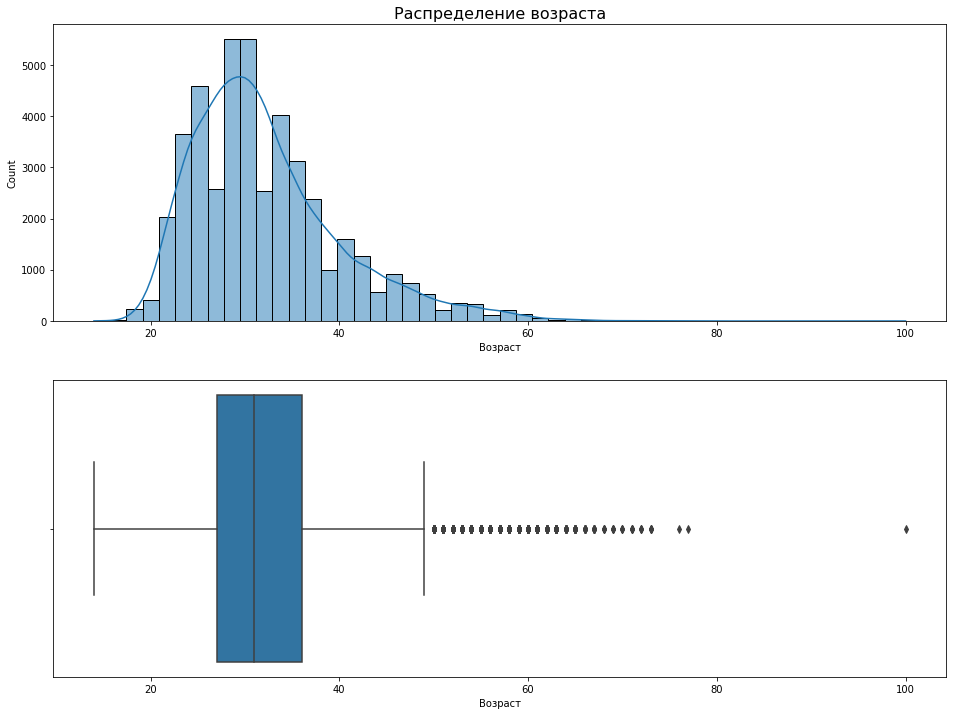

In [309]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
sns.histplot(
    data=hh_df,
    x='Возраст',
    bins=50,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение возраста', fontsize=16)
sns.boxplot(
    data=hh_df,
    x='Возраст',
    orient = 'h',
    width = 0.9,
    ax=axes[1]
);

display(hh_df['Возраст'].mode()) # Выводим на экрам модальное значение

**Вывод из графика** 
Распределение логнормальное. 
Из графика видно, что модальное значение возраста равно 30 годам.  
Предельные значения возраста от 14 до 100 лет, большинство соискателей в возрасте от 20 до 45 лет.  
Из второго графика видно, что очевидной аномалией является возраст 100 лет, и также опираясь на российское законодательство, пенсионный возраст для мужчин начинается в 65 лет, а для женщин и вовсе в 60. Так что, по сути все значения возраста более 65 лет можно считать выбросами.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [310]:
hh_df['Опыт работы (месяц)'].describe()

count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

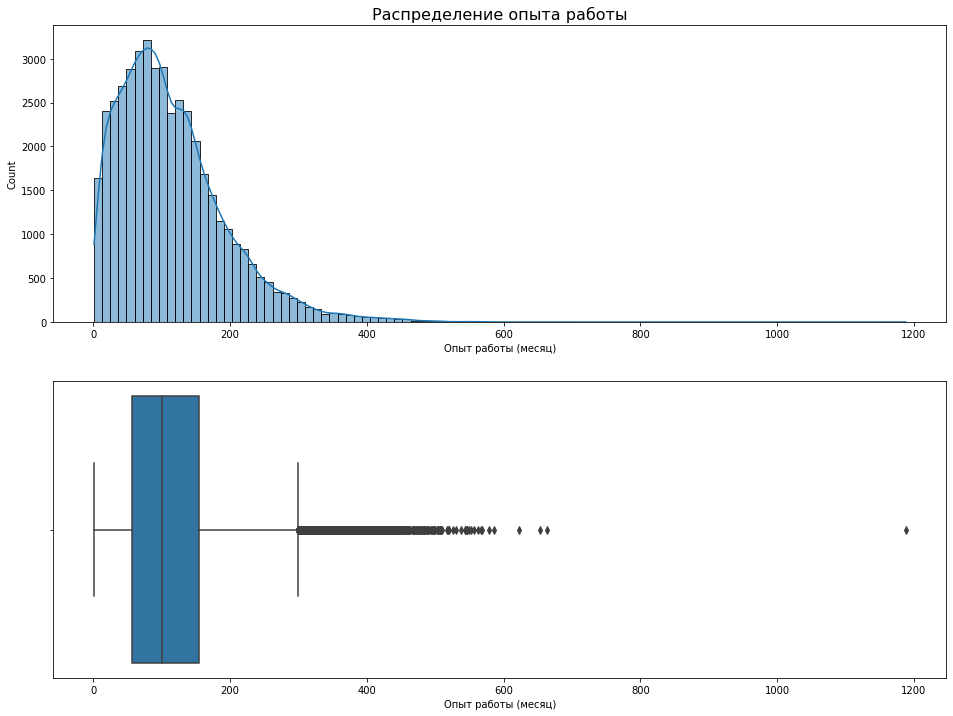

In [311]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
sns.histplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    bins=100,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение опыта работы', fontsize=16)
sns.boxplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    orient = 'h',
    width = 0.9,
    ax=axes[1]
);

**Вывод из графика** 
Распределение логнормальное. 
Из графика видно, что модальное значение опыта работы равно 84 месяцам (это 7 лет).  
Предельные значения опыта работы от 1 до 1188 месяцев, большинство соискателей с опытом работы от 1 месяца до 180 месяцев (15 лет).  
Из второго графика видно, что очевидной аномалией является опыт работы 1188 месяцев,также к аномалным можно отнести значения опыта работы более 600 месяцев (это более 50 лет).

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [312]:
hh_df['ЗП(руб)'].describe()

count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП(руб), dtype: float64

In [313]:
# Модальное значение
hh_df['ЗП(руб)'].mode()

0    50000.0
Name: ЗП(руб), dtype: float64

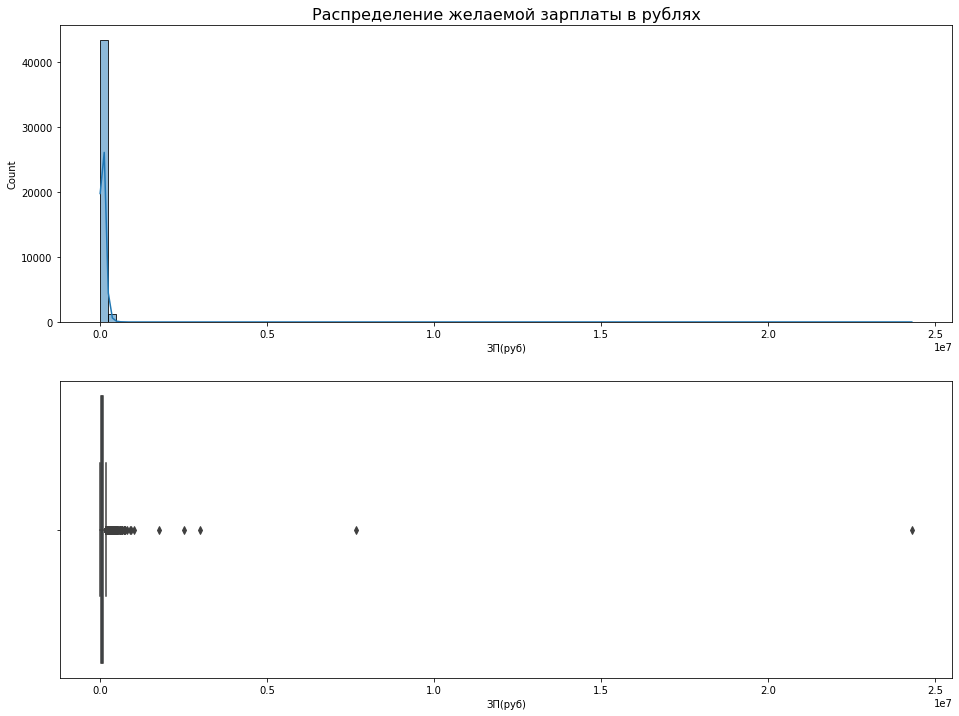

In [314]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
sns.histplot(
    data=hh_df,
    x='ЗП(руб)',
    bins=100,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение желаемой зарплаты в рублях', fontsize=16)
sns.boxplot(
    data=hh_df,
    x='ЗП(руб)',
    orient = 'h',
    width = 0.9,
    ax=axes[1]
);

**Вывод из графика**  
График является малоинформативным. Из него можно выделить 5 человек с желаемой зарплатой более 1 млн. рублей. Два значения являются явной аномалией, это 7.5 млн. и 24.3 млн. Предельные значения от 1 рубля до 24.3 млн.рублей  

Чтобы увидеть распределение основной массы соискателей, построим график для соискателей, чья желаемая зарплата менее 1 млн. рублей.


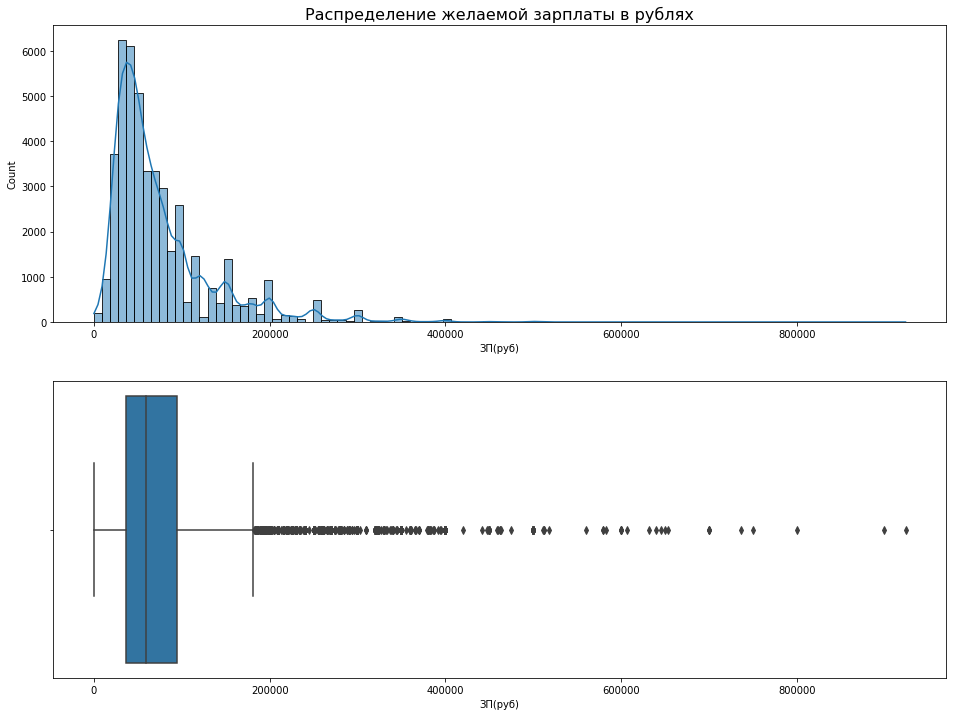

In [315]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
sns.histplot(
    data=hh_df[hh_df['ЗП(руб)'] < 1000000],
    x='ЗП(руб)',
    bins=100,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение желаемой зарплаты в рублях', fontsize=16)
sns.boxplot(
    data=hh_df[hh_df['ЗП(руб)'] < 1000000],
    x='ЗП(руб)',
    orient = 'h',
    width = 0.9,
    ax=axes[1]
);

**Вывод из графика**  
Распределение логнормальное. 
Из графика видно, что модальное значение желаемой зарплаты равно 50000 рублей .  
Большинство соискателей желает зарплату от 25000 до 100000 рублей.  

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

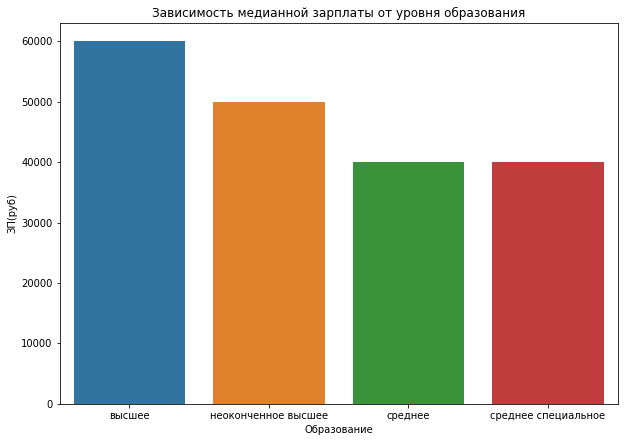

In [316]:
fig = plt.figure(figsize=(10, 7))
bar_data = hh_df[hh_df['ЗП(руб)'] < 1000000].groupby('Образование', as_index = False).median()
barplot = sns.barplot(
    data=bar_data,
    x='Образование',
    y='ЗП(руб)',
)
barplot.set_title('Зависимость медианной зарплаты от уровня образования');

**Вывод из графика**   
Из графика видно, что максимальный уровень желаемой заработной платы у соискателей с высшим образованием, а минимальный - со средним и средним специальным образованием.  
Уровень образования не сильно влияет на заработную плату. Этот признак больше необходим для ряда работобателей. По моему мнению, высшее учебное заведение в целом учит учится, правильно излагать и презентовать свою идею, в этом заключается основная мысль сдачи дипломной работы и получения высшего образования. Соискатели с высшим образованием могут потенциально претендовать на высокую руководящую должность. Думаю, что уровень заработной платы больше зависит от конкретных знаний  и умений, а также опыта работы в той сфере деятельности,на вакансию которой, претендует соискатель.  
Но так как соискатели все же опираются на свой уровень образования при указании желаемо зарплаты, то признак будет важен для прогнозирования. 

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

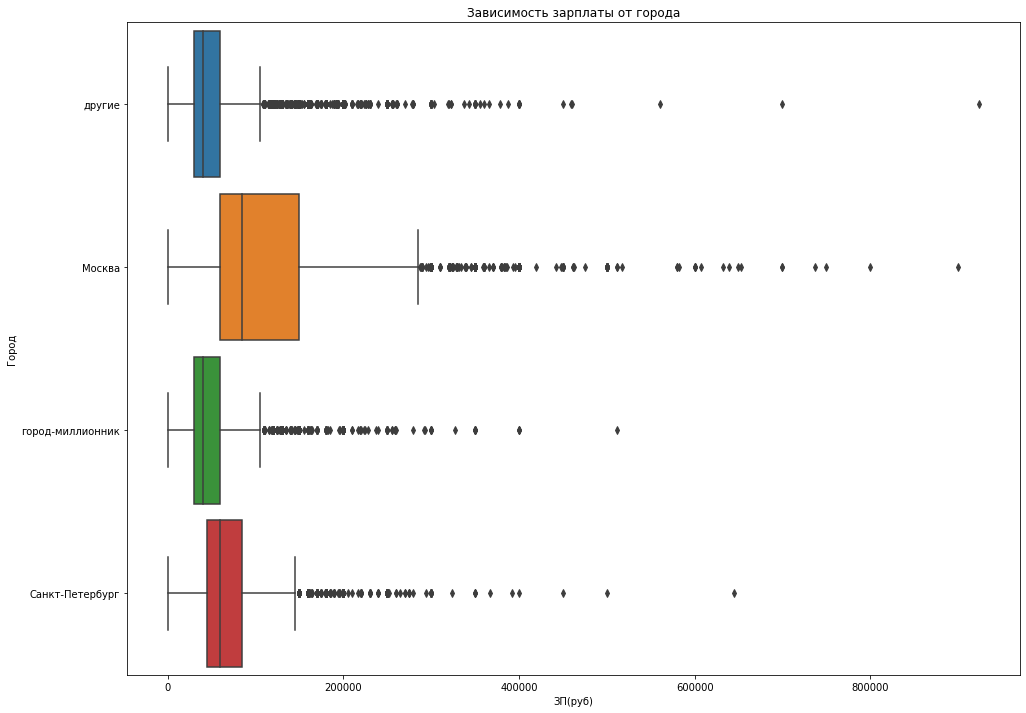

In [317]:
fig = plt.figure(figsize=(16, 12))
box_data = hh_df[hh_df['ЗП(руб)'] < 1000000]
boxplot = sns.boxplot(
    data=box_data,
    x='ЗП(руб)',
    y='Город',
    orient = 'h',
    width = 0.9
);
boxplot.set_title('Зависимость зарплаты от города');


**Вывод из графика**   
Из графика видно, что максимальная медианная желаемая зарплата и максимальный размах в Москве, в Санкт-Петербурге поменьше. в остальных городах примерно одинаково.  
Признак города важен для прогнозирования зарплаты.  

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

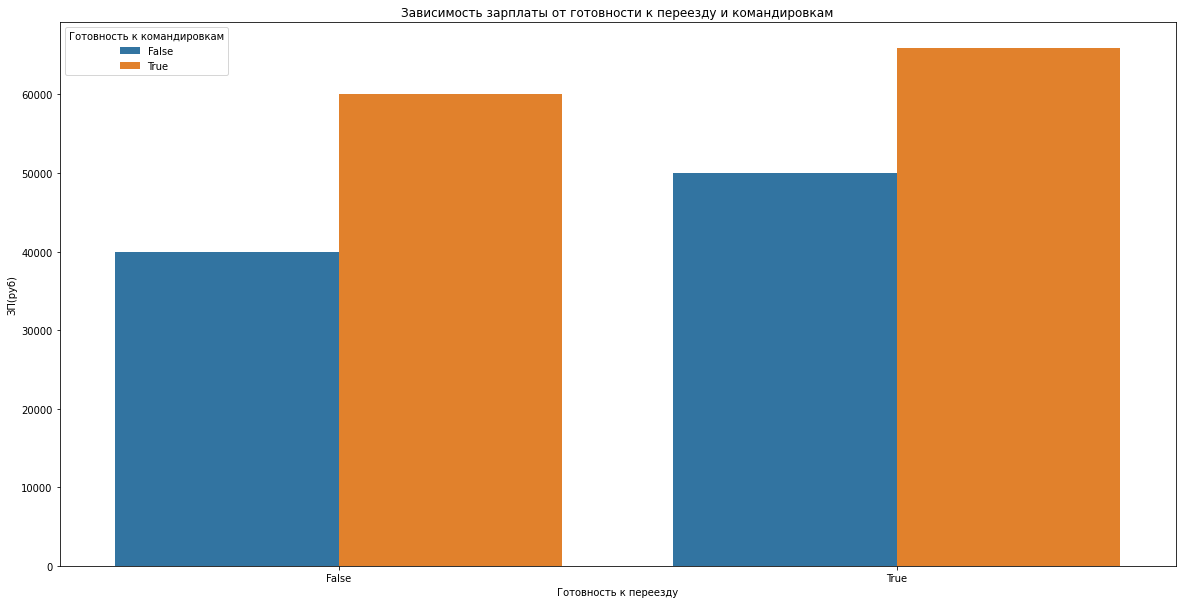

In [318]:
fig = plt.figure(figsize=(20, 10))
bardata = hh_df.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП(руб)'].median()
barplot = sns.barplot(
    data=bardata,
    x='Готовность к переезду',
    y='ЗП(руб)',
    hue='Готовность к командировкам'
)
barplot.set_title('Зависимость зарплаты от готовности к переезду и командировкам');

In [319]:
round(bardata['ЗП(руб)'].max() / 1000)

66

**Вывод из графика**  
Самую большую зарплату указывают соискатели готовые и к переезду и к командировкам, чуть меньше указывают зарплату не готовые к переезду, но готовые к командировкам. Самую низкую заплату указывают те, кто не готов к переездам и командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [320]:
pivot = hh_df.pivot_table(
    values='ЗП(руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
)
pivot

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Образование,,,,,,,,,,,,,,,,,,,,,
высшее,60000.0,NaN,122582.49,90075.5,30000.0,30000.0,30000.0,35000.0,40000.0,45000.0,...,70000.0,79000.0,112500.0,80000.0,75000.0,75000.0,62500.0,45000.0,90000.0,NaN
неоконченное высшее,NaN,NaN,NaN,80000.0,25000.0,30000.0,31000.0,35000.0,40000.0,40000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
среднее,NaN,10000.0,NaN,44000.0,35000.0,45000.0,29000.0,40000.0,40000.0,35000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
среднее специальное,NaN,2000.0,30000.00,25000.0,25151.0,30000.0,30000.0,30000.0,30000.0,35000.0,...,120000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.0


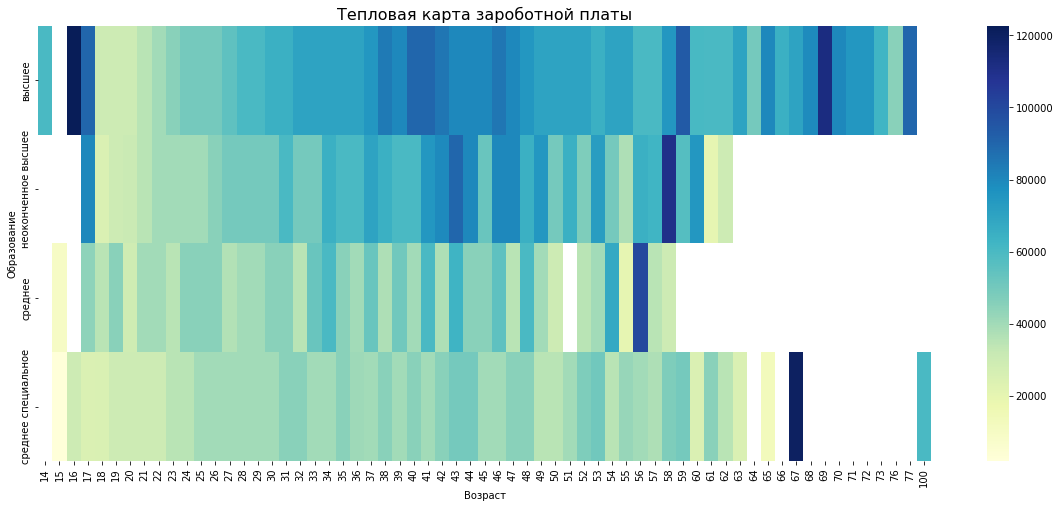

In [321]:
fig = plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта зароботной платы', fontsize=16);

**Вывод из графика**  
В группе "среднее специальное образование" в глаза бросаются соискатели возраста 67 и 100 лет (скорее всего это потенциальные выбросы), в остальных возрастных группах желаемая зароботная плата вполне реальна.  
В группе "среднее образование" значения без каких-то аномалий, в 56 лет указана самая большая желаемая зарплата, к этому возрасту вполне реально набраться опыта, чтобы на нее претендовать.  
В группе "неоконченное высшее образование" есть соискатель 17-ти лет, в этом возрасте только поступают в высшие учебные заведения, следовательно это значение можно считать выбросом. Самые большие запросы по зарплате в этой группе у соискателей в возрасте 58 лет и 43 лет.  
В группе "высшее образование" аналогичная ситуация с соискателями младше 18 лет. Также в глаза бросаются соискатели старше 65 лет(пенсионный возраст).
В целом в этой группе, как и должно быть, указаны самые высокие желаемые зарплаты.


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

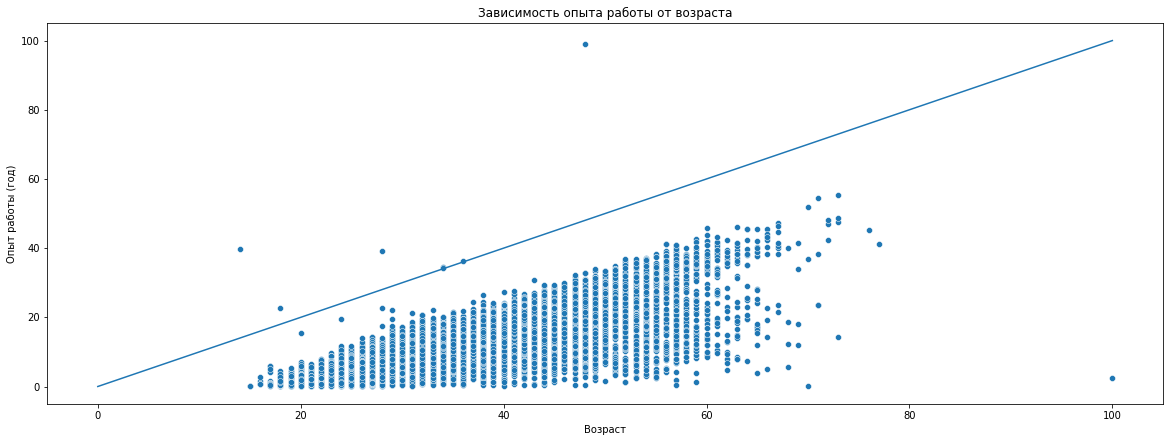

In [322]:
hh_df['Опыт работы (год)'] = hh_df['Опыт работы (месяц)'] / 12

fig = plt.figure(figsize=(20, 7))
sns.lineplot(x = [0,100], y = [0,100])
scatter = sns.scatterplot(
    data=hh_df,
    x='Возраст',
    y='Опыт работы (год)'
)
scatter.set_title('Зависимость опыта работы от возраста');



In [323]:
# Находим сколько точек лежит выше прямой 
print(hh_df['Опыт работы (год)'][hh_df['Опыт работы (год)'] >= hh_df['Возраст']].count())

7


In [324]:
# Удаляем, созданный на время, признак "Опыт работы (год)"
hh_df = hh_df.drop('Опыт работы (год)', axis = 1)

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".

Построим тепловую карту зависимости медианной желаемой зарплаты от признаков 'Пол' и 'Возраст'.

In [325]:
pivot = hh_df.pivot_table(
    values='ЗП(руб)',
    index='Пол',
    columns='Возраст',
    aggfunc='median',
)
pivot

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Пол,,,,,,,,,,,,,,,,,,,,,
Ж,NaN,NaN,NaN,25000.0,22500.0,30000.0,25000.0,30000.0,30000.0,40000.0,...,NaN,NaN,45000.0,25000.0,NaN,25000.0,85000.0,NaN,NaN,NaN
М,60000.0,6000.0,40000.0,30000.0,30000.0,30000.0,30000.0,35000.0,40000.0,40000.0,...,80000.0,79000.0,180000.0,215000.0,75000.0,77500.0,50000.0,45000.0,90000.0,60000.0


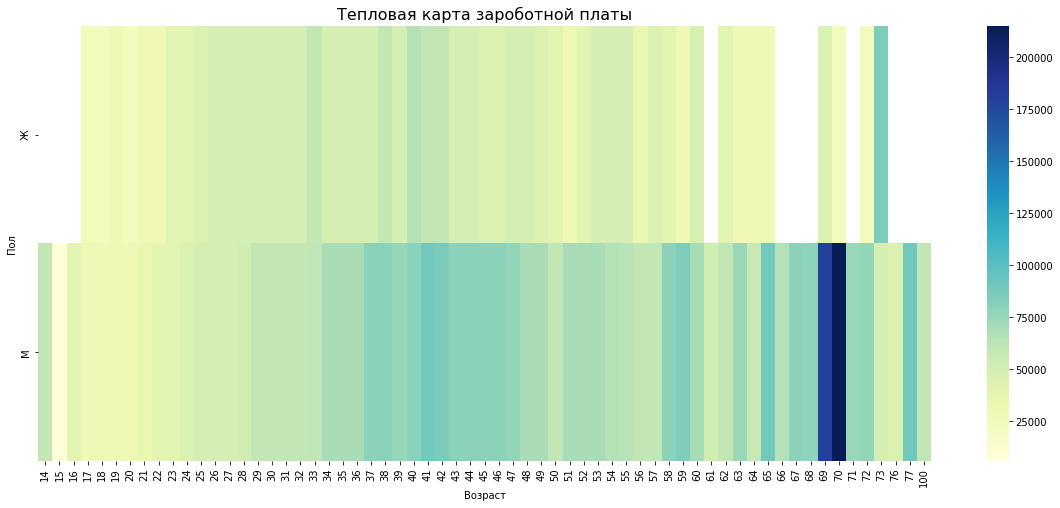

In [326]:
fig = plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта зароботной платы', fontsize=16);

**Вывод из графика**  
Из тепловой карты видно, что мужчины указывают заработную плату выше, чем женщины.

Построим корреляционную матрицу

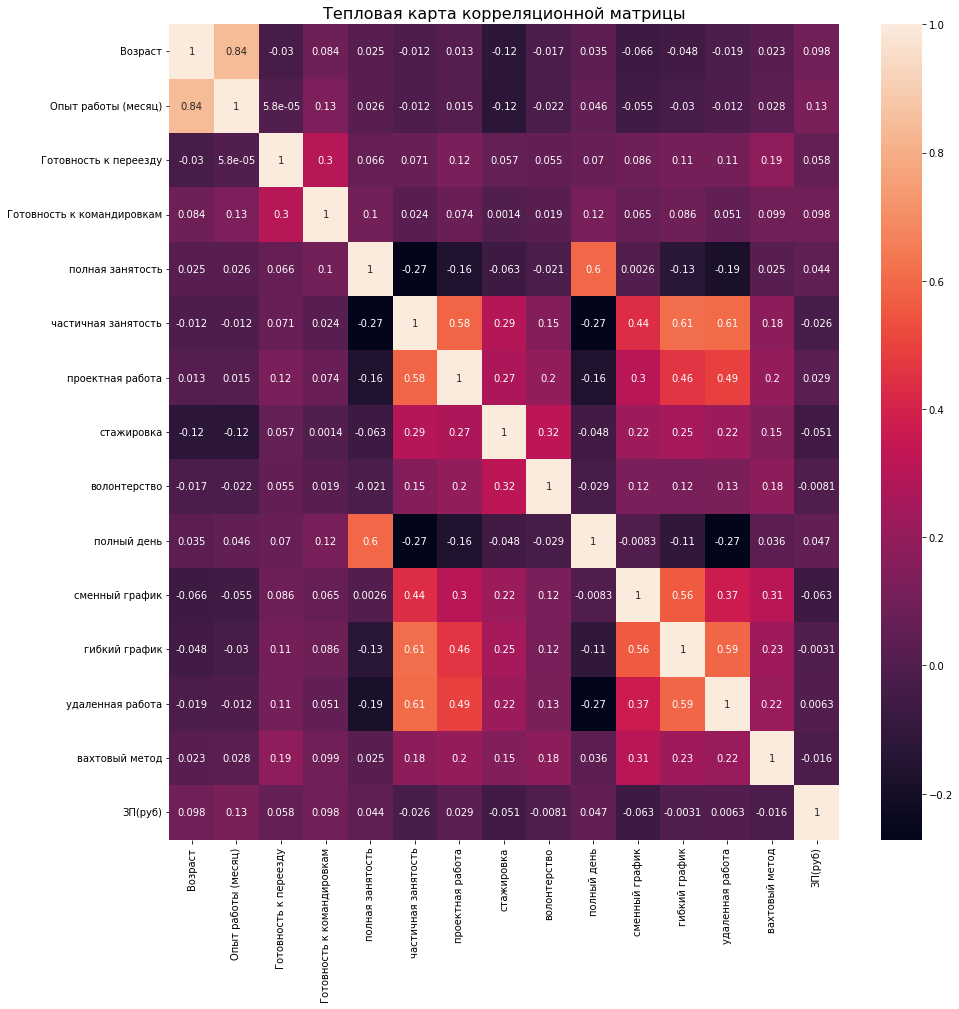

In [327]:
# Построим корреляционную матрицу и изобразим тепловую карту
corr_matrix=hh_df.corr()

fig=plt.figure(figsize=(15,15))
heatmap = sns.heatmap(corr_matrix, annot=True)
heatmap.set_title('Тепловая карта корреляционной матрицы', fontsize=16);

**Вывод к графику**  
Из тепловой карты корреляционной матрицы мы видим, что зароботная плата соискателей зависит от признаков: "Опыт работы (месяц)", "Возраст","Готовность к командировкам", "Готовность к переездам", "полная занятость", "полный день", "проектная работа", "удаленная работа"

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [328]:
dupl_columns = list(hh_df.columns)

mask = hh_df.duplicated(subset=dupl_columns)# Создадим маску дубликатов с помощью метода duplicated()
hh_duplicates = hh_df[mask]# Произведем фильтрацию
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')# Выводим на экран число дубликатов

Число найденных дубликатов: 161


In [329]:
# Удаляем полные дубликаты
hh_df = hh_df.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_df.shape[0]}')

Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [330]:
display(hh_df.info())
display(hh_df['Опыт работы (месяц)'].isnull().value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44583 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44583 non-null  object 
 1   Последнее/нынешнее место работы  44582 non-null  object 
 2   Последняя/нынешняя должность     44581 non-null  object 
 3   Обновление резюме                44583 non-null  object 
 4   Авто                             44583 non-null  object 
 5   Образование                      44583 non-null  object 
 6   Пол                              44583 non-null  object 
 7   Возраст                          44583 non-null  int64  
 8   Опыт работы (месяц)              44415 non-null  float64
 9   Город                            44583 non-null  object 
 10  Готовность к переезду            44583 non-null  bool   
 11  Готовность к командировкам       44583 non-null  bool   
 12  полная занятость  

None

False    44415
True       168
Name: Опыт работы (месяц), dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [331]:
# В столбце "Опыт работы (месяц)" заменяем пропуски на медианное значение
values = {
    'Опыт работы (месяц)': hh_df['Опыт работы (месяц)'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
hh_df = hh_df.fillna(values)

#удаляем записи, в которых есть хотя бы 1 пропуск
hh_df = hh_df.dropna(how='any', axis=0)
print(f'Результирующее число записей: {hh_df.shape[0]}')

Результирующее число записей: 44581


In [332]:
# Находим среднее значение опыта работы
round(hh_df['Опыт работы (месяц)'].mean())

114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [333]:
# Создаем маску и смотрим сколько выбросов
outliers = hh_df[(hh_df['ЗП(руб)'] > 1000000) | (hh_df['ЗП(руб)'] < 1000)]
print (outliers.shape[0])

# Удаляем строки с выбросами
hh_df = hh_df.drop(outliers.index, axis = 0)

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных

In [334]:
# Создаем маску и смотрим сколько выбросов
outliers = hh_df[hh_df['Возраст'] < (hh_df['Опыт работы (месяц)'] / 12)]
print (outliers.shape[0])

# Удаляем данные строки с выбросами
hh_df = hh_df.drop(outliers.index, axis = 0)

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

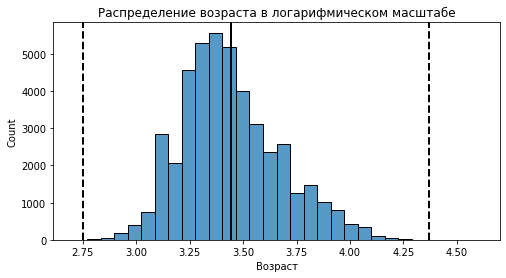

In [335]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_df['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax = ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение возраста в логарифмическом масштабе');


In [336]:
# Находим коэффициент ассиметрии
print(log_age.skew())

0.4523422276053838


**Вывод к графику**  
Ассиметрия правосторонняя

In [337]:
def outliers_z_score(data, feature, left = 3, right = 4, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(hh_df, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


In [338]:
outliers

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,стажировка,волонтерство,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП(руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,True,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,False,True,False,True,True,False,60000.0


Возраст соискателей, попавших в выбросы, 15 и 100 лет

In [339]:
# Удаляем найденные выбросы
hh_df = hh_df.drop(outliers.index, axis = 0)